<a href="https://colab.research.google.com/github/Sankeetha-Elancheliyan/CM2604-ML-CW/blob/main/ML_CW_Decision_Trees_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

In [4]:
# Check for null values
print(data.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64


In [5]:
# Remove null values
data.dropna(inplace=True)

In [6]:
# Check for duplicates
print(data.duplicated().sum())

391


In [7]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [8]:
# Split features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [9]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Perform PCA on the training data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
principle_components = pca.fit_transform(X)

In [12]:
# Get the explained variance ratios and number of features extracted
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)
n_components = pca.n_components_
print(n_components)

[9.25462065e-01 7.25629100e-02 1.91461432e-03 1.02875405e-05
 7.15869294e-06]
5


In [13]:
# create a DataFrame from the transformed data
pca_df = pd.DataFrame(data=principle_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# print the DataFrame
print(pca_df)

              PC1         PC2        PC3       PC4       PC5
0      -11.600978   10.680921  -2.502124 -0.809472 -0.109700
1      735.050164  -70.631211  -1.008541 -1.839827  0.284613
2     2011.760589  108.977003 -25.300167  0.078987  0.114324
3     -100.843543    4.030041  -1.237882 -1.394402  0.063179
4     -100.843544    4.030039  -1.237879 -1.394299  0.063173
...           ...         ...        ...       ...       ...
4205  -208.470738  -15.967542  -0.745520  0.291853 -0.432090
4206  -281.339988   -3.032358  -0.816279 -3.541935  0.512334
4207  -178.377573  -17.824756  -0.611699 -0.338601 -0.303943
4208  -218.018609  -12.391679  -0.977085 -0.554278 -0.161198
4209  -255.521900   -6.264065  -1.075588 -2.334811  0.358922

[4210 rows x 5 columns]


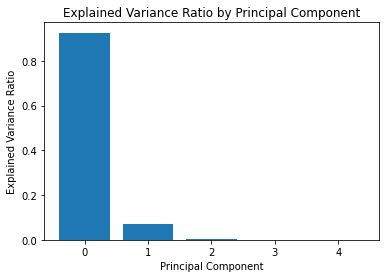

In [14]:
import matplotlib.pyplot as plt

# assuming pca is your trained PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# create a bar chart of the explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


In [15]:
# Train a Decision Tree Classifier on the PCA-transformed data
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [16]:
# Apply PCA to the test data
X_test_pca = pca.transform(X_test)

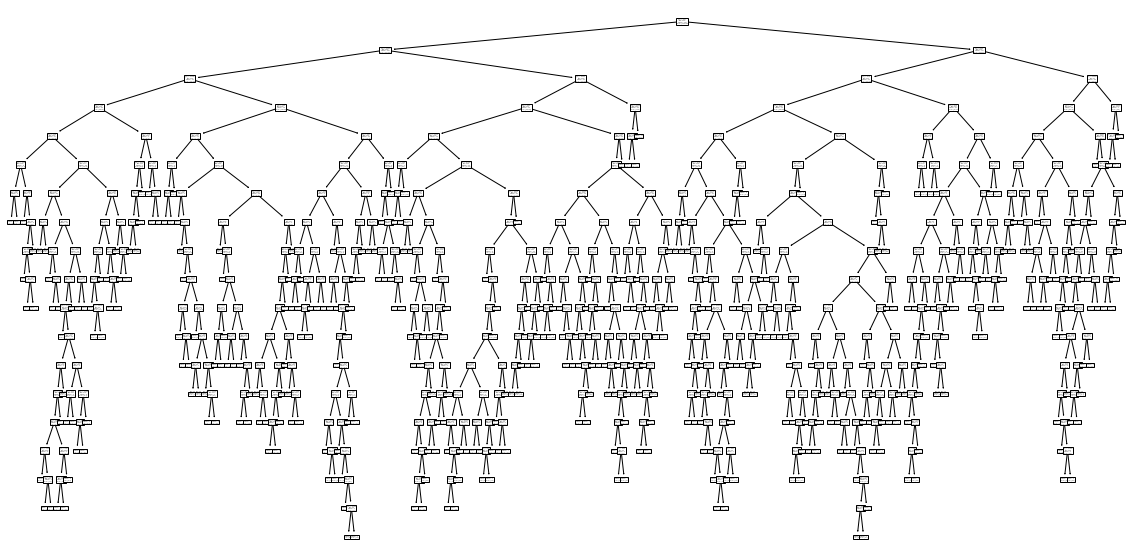

In [17]:
from sklearn import tree
# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dtc)
plt.show()

In [18]:
y_pred = dtc.predict(X_test_pca)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       483
           1       0.78      0.77      0.78       359

    accuracy                           0.81       842
   macro avg       0.81      0.81      0.81       842
weighted avg       0.81      0.81      0.81       842



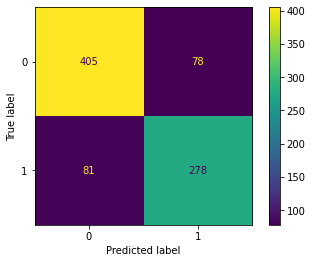

In [21]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [25]:
import numpy as np
input_data=[-11.600978  , 10.680921 , -2.502124, -0.809472 ,-0.109700]
reshaped_input = np.array(input_data).reshape(1, -1)
classify=dtc.predict(reshaped_input)
if classify == 0:
  print("NO-SPAM")
elif classify== 1:
  print("SPAM")

SPAM


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Evaluate the model on the test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))
print("Confusion Matrix:\n", conf_matrix)